## Libraries Call 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Data Reading 

In [6]:
#link1="/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data/Enginnerd_Data.csv"
link1="/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/ED.csv"
#link1="/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/combined_data.csv"
#link1="/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Last_chance.csv"

In [7]:
def read_data(link):
    Data=pd.read_csv(link,index_col=0)
    Data.drop_duplicates(inplace=True)
  
    return Data
Data=read_data(link1)


In [8]:
Data.columns

Index(['Id', 'Price', 'Bedrooms', 'Living_Area', 'Is_Equiped_Kitchen',
       'Terrace', 'Garden', 'State', 'Facades', 'Locality_encoded',
       'Type_encoded', 'SubType_encoded', 'Prov_encoded', 'Region_encoded',
       'Is_On_Coast', 'GDP', 'Avg_rent', 'Avg price', 'Bedrooms_per_area'],
      dtype='object')

In [10]:
Data

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,Is_On_Coast,GDP,Avg_rent,Avg price,Bedrooms_per_area
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,0,62123,950.0,2546,0.016260
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,0,36940,759.0,1618,0.021739
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,0,51731,1013.0,2841,0.026087
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,0,62123,950.0,2546,0.025000
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,0,62123,950.0,2546,0.019355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0,1,52323,950.0,2888,0.024390
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0,0,52323,950.0,2888,0.031008
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0,0,52323,950.0,2888,0.012739
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0,0,52323,950.0,2888,0.015789


### Data Noramlization

In [11]:
def Normalize_Data(Data1):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(Data1)
    return normalized_data
X_=Normalize_Data()
X_


TypeError: Normalize_Data() missing 1 required positional argument: 'Data1'

# In OOP Shape

In [12]:
class Data_Prep:
    def __init__(self,Link) -> None:
        self.Link=Link
        self.Data=self.read_data()
        
        self.X = self.Data.drop(columns=["Price"
                                         ])  # All columns except 'Price' are features
        self.y= self.Data['Price']  # Target variable is 'Price'

        pass


    def read_data(self):
        Data=pd.read_csv(self.Link,index_col=0)
        
        return Data
    
    def Normalize_Data(self):
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(self.X)
        return normalized_data
    
    def Spliter (self):
        X_=self.Normalize_Data()
        y1=np.log(self.y)

        X_train, X_test, y_train, y_test = train_test_split(X_, y1, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test

In [13]:
Data_obj=Data_Prep(link1)

In [14]:
X_train, X_test, y_train, y_test =Data_obj.Spliter()

In [15]:
len(X_train)

8547

In [16]:
len(y_train)


8547

# The Model

In [17]:

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=3000,  # Number of boosting iterations
                          learning_rate=0.1,  # Learning rate
                          depth=5,  # Depth of the trees
                          random_seed=42  # Random seed for reproducibility  
                          ,eval_metric="RMSE"
                          )

In [19]:
model.fit(X_train, y_train)


0:	learn: 0.4564051	total: 47.9ms	remaining: 2m 23s
1:	learn: 0.4405795	total: 49.8ms	remaining: 1m 14s
2:	learn: 0.4270562	total: 51.6ms	remaining: 51.6s
3:	learn: 0.4146738	total: 54.1ms	remaining: 40.5s
4:	learn: 0.4040925	total: 55.5ms	remaining: 33.3s
5:	learn: 0.3948635	total: 56.9ms	remaining: 28.4s
6:	learn: 0.3866886	total: 58.8ms	remaining: 25.1s
7:	learn: 0.3794457	total: 61ms	remaining: 22.8s
8:	learn: 0.3726444	total: 62.7ms	remaining: 20.8s
9:	learn: 0.3662805	total: 64.6ms	remaining: 19.3s
10:	learn: 0.3613520	total: 66.2ms	remaining: 18s
11:	learn: 0.3570397	total: 67.7ms	remaining: 16.8s
12:	learn: 0.3536530	total: 69.2ms	remaining: 15.9s
13:	learn: 0.3497453	total: 70.6ms	remaining: 15.1s
14:	learn: 0.3465482	total: 74.5ms	remaining: 14.8s
15:	learn: 0.3436353	total: 77.1ms	remaining: 14.4s
16:	learn: 0.3399078	total: 79.4ms	remaining: 13.9s
17:	learn: 0.3373237	total: 80.7ms	remaining: 13.4s
18:	learn: 0.3353138	total: 82.1ms	remaining: 12.9s
19:	learn: 0.3329470	tot

In [20]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
#
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

R² score: 0.766950490295919


In [111]:
model = CatBoostRegressor(random_seed=42, eval_metric='RMSE', verbose=0)

# Hyper Parameter Tuning

In [112]:
def HPT(model):

    # Define the hyperparameter grid
    param_grid = {
        'iterations': [100, 200, 3000],
        'learning_rate': [0.02, 0.03, 0.1],
        'depth': [4, 5, 6],
        'l2_leaf_reg': [2, 5,7],
    }

    # Perform Grid Search
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best RMSE: {-grid_search.best_score_}")
    return

In [113]:
HPT(model)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'depth': 6, 'iterations': 3000, 'l2_leaf_reg': 7, 'learning_rate': 0.1}
Best RMSE: 0.2416835825568792


## Cross Validation


In [83]:
model1 = CatBoostRegressor(iterations=3000, depth=6, learning_rate=0.03,l2_leaf_reg=2,random_seed=42, eval_metric='RMSE', verbose=0)

In [84]:
from sklearn.metrics import r2_score
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
#

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

R² score: 0.7641463447076864


In [34]:
def CV(model):

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

    # Print the Mean RMSE (negative sign because scikit-learn expects higher scores to be better)
    print(f"Mean RMSE: {-np.mean(cv_scores)}")
    return

In [477]:
CV(model1)

Mean RMSE: 94096.91723903893


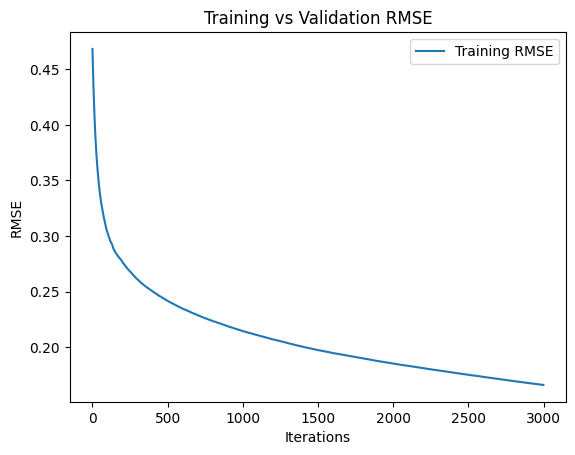

In [89]:
import matplotlib.pyplot as plt

# Assuming model has been trained with validation data
eval_results = model1.get_evals_result()

# Accessing the training and validation RMSE
plt.plot(eval_results['learn']['RMSE'], label='Training RMSE')

plt.legend()
plt.title("Training vs Validation RMSE")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.show()


## Adding the validation 

In [84]:
X

,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area,Locality_mean_Price,Is_On_Coast,GDP,Avg_rent
0,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260,323142.461538,0,62123,950.0
1,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739,243851.833333,0,36940,759.0
2,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087,425100.000000,0,51731,1013.0
3,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000,308913.551020,0,62123,950.0
4,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355,308913.551020,0,62123,950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,2,82,0,1,0,1,0,180,0,3,5,0,3953.000000,0.024390,311149.338843,1,52323,950.0
10680,4,129,0,1,0,3,0,535,0,6,5,0,5418.604651,0.031008,688026.363636,0,52323,950.0
10681,2,157,0,0,0,3,2,535,0,3,5,0,6050.955414,0.012739,688026.363636,0,52323,950.0
10682,3,190,0,1,0,1,0,509,0,3,5,0,2960.526316,0.015789,284657.727273,0,52323,950.0


In [85]:
y

0        329000
1        180000
2        369000
3        145000
4        269000
          ...  
10679    324146
10680    699000
10681    950000
10682    562500
10683    305000
Name: Price, Length: 10684, dtype: int64

In [85]:
X = Data.drop(columns=["Price",'Locality_mean_Price'
                                         ])  # All columns except 'Price' are features
y= Data['Price']  # Target variable is 'Price'

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Now split the temporary set into validation and test (50% each of the temporary set)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [90]:
from catboost import CatBoostRegressor

# Initialize CatBoost model
model = CatBoostRegressor(iterations=10000,od_type='IncToDec',  # Overfitting detection type
    od_pval=0.01,  learning_rate=0.1, depth=6, random_seed=42, eval_metric="RMSE")

# Fit the model with training and validation data
model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=50)

# Now, use the test set for final evaluation
y_pred = model.predict(X_test)

# Evaluate the model performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE on test data
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE on Test Set: {rmse}")

# Calculate R² score on test data
r2 = r2_score(y_test, y_pred)
print(f"R² on Test Set: {r2}")


0:	learn: 163240.6285600	test: 166268.8133483	best: 166268.8133483 (0)	total: 2.08ms	remaining: 20.8s
50:	learn: 110812.7172399	test: 115808.7738070	best: 115808.7738070 (50)	total: 140ms	remaining: 27.3s
100:	learn: 102643.4504892	test: 108535.1431279	best: 108535.1431279 (100)	total: 256ms	remaining: 25.1s
150:	learn: 97888.6221823	test: 105195.2520817	best: 105195.2520817 (150)	total: 357ms	remaining: 23.3s
200:	learn: 94667.4855269	test: 103045.8320009	best: 103045.8320009 (200)	total: 457ms	remaining: 22.3s
250:	learn: 91721.2895814	test: 101406.1944092	best: 101406.1944092 (250)	total: 574ms	remaining: 22.3s
300:	learn: 89492.8711575	test: 100359.3214667	best: 100359.3214667 (300)	total: 684ms	remaining: 22.1s
350:	learn: 87572.5590522	test: 99526.8847482	best: 99526.8847482 (350)	total: 789ms	remaining: 21.7s
400:	learn: 85580.5173021	test: 98625.6135167	best: 98621.9646586 (395)	total: 896ms	remaining: 21.4s
450:	learn: 84002.3125991	test: 97986.9920906	best: 97980.6346157 (449

/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/immo_venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
Data.Price.mean()


371968.65144140774

In [342]:
import optuna
from catboost import CatBoostRegressor

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 1000, 5000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'eval_metric': 'RMSE'
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)
    y_pred = model.predict(X_valid)
    return mean_squared_error(y_valid, y_pred, squared=False)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best parameters
best_params = study.best_params
print("Best parameters:", best_params)


/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/immo_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-12-04 14:37:50,113] A new study created in memory with name: no-name-72a3ba70-f260-4475-8e09-3e89af6f65fb
/tmp/ipykernel_157057/3202625921.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
/tmp/ipykernel_157057/3202625921.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.sugg

Best parameters: {'iterations': 2129, 'learning_rate': 0.29432400883661, 'depth': 4, 'l2_leaf_reg': 2.977059326569487}


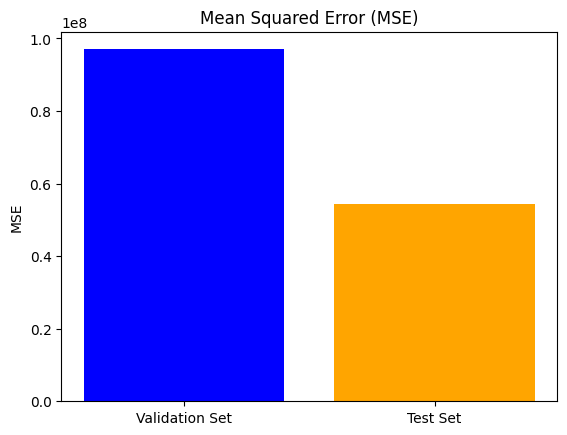

In [65]:
# Predict on test and validation sets
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

# Calculate MSE for validation and test sets
mse_valid = mean_squared_error(y_valid, y_valid_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Create a bar chart for comparison
plt.bar(['Validation Set', 'Test Set'], [mse_valid, mse_test], color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.show()

In [87]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Log-transform the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Initialize CatBoostRegressor
model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.03,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=50
)

# Train the model using the log-transformed target
model.fit(
    X_train, y_train_log,
    eval_set=(X_valid, np.log1p(y_valid)),
    verbose=50,
    use_best_model=True
)

# Predict in the log-transformed space
y_test_pred_log = model.predict(X_test)

# Convert predictions back to the original scale
y_test_pred = np.expm1(y_test_pred_log)

# Evaluate the model
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print(f"RMSE on Test Set: {rmse}")
print(f"R² on Test Set: {r2}")


0:	learn: 0.4635557	test: 0.4921079	best: 0.4921079 (0)	total: 2.53ms	remaining: 7.58s
50:	learn: 0.1914858	test: 0.1973989	best: 0.1973989 (50)	total: 214ms	remaining: 12.4s
100:	learn: 0.0947235	test: 0.0949220	best: 0.0949220 (100)	total: 337ms	remaining: 9.67s
150:	learn: 0.0607767	test: 0.0608999	best: 0.0608999 (150)	total: 442ms	remaining: 8.33s
200:	learn: 0.0447463	test: 0.0462618	best: 0.0462618 (200)	total: 538ms	remaining: 7.49s
250:	learn: 0.0356976	test: 0.0384890	best: 0.0384890 (250)	total: 630ms	remaining: 6.89s
300:	learn: 0.0298796	test: 0.0339756	best: 0.0339756 (300)	total: 720ms	remaining: 6.46s
350:	learn: 0.0259543	test: 0.0311874	best: 0.0311874 (350)	total: 814ms	remaining: 6.14s
400:	learn: 0.0231536	test: 0.0295043	best: 0.0295043 (400)	total: 900ms	remaining: 5.83s
450:	learn: 0.0209107	test: 0.0281226	best: 0.0281226 (450)	total: 999ms	remaining: 5.64s
500:	learn: 0.0191896	test: 0.0270470	best: 0.0270470 (500)	total: 1.1s	remaining: 5.47s
550:	learn: 0.01

/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/immo_venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Testing more data


In [88]:
from joblib import dump, load

# Save the model to a file
dump(model, 'model_Hussain.joblib')


['model_Hussain.joblib']